In [1]:
# FLORIS tools notebook - this defines all of the tools the FLORIS can do (see diagram)

In [2]:
%matplotlib inline
import imp
import copy

import florisCoreFunctions.windPlant as windPlant
import florisCoreFunctions.OptModules as optimizers

from inputClasses.layouts import layout2 as layoutClass
import inputClasses.controlSettings
import inputClasses.modelData

from visualizationTools.viewer import viewer

# Input Data

In [3]:
# =============================================================================
#                      Basic model run for power prediction
# =============================================================================

# Select a velocity, deflection and wake summing model
model = inputClasses.modelData.modelData(2, 1, 2)

# Select a wind farm layout and specify how the turbine control mode
layout = layoutClass(True, False)

# Generate control settings for the turbines in the layout
# all turbines set aligned with wind
cSet = inputClasses.controlSettings.neutral(layout)

# Output Data

Effective Velocities and turbine powers
Turbine  0  velocity =  6.97936532962  power =  [ 1162592.50472816]
Turbine  1  velocity =  5.64929519483  power =  [ 616595.43175281]
Turbine  2  velocity =  6.97936532962  power =  [ 1162592.50472816]
Turbine  3  velocity =  5.64929519483  power =  [ 616595.43175281]
[ 3558375.87296193] 

preparing the flowfield for plotting...



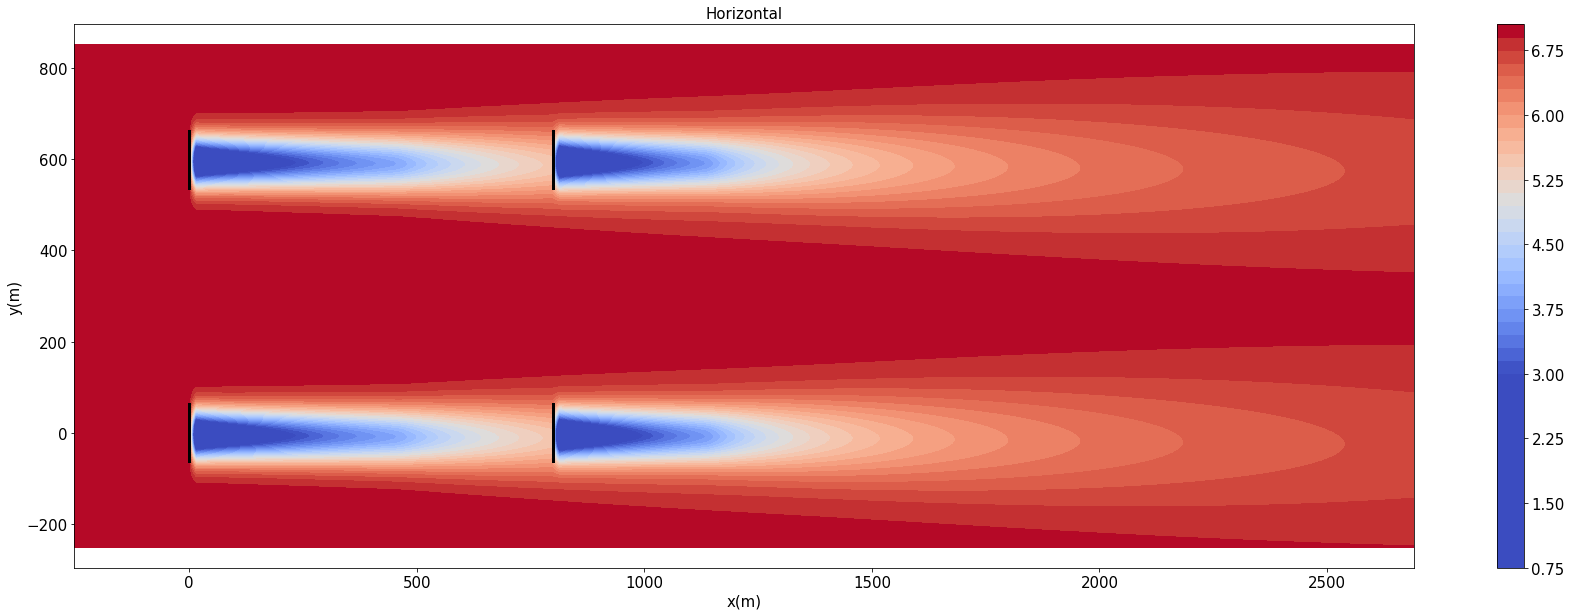

In [4]:
# Run the model and get an output object
outputNeutral = windPlant.windPlant(model, layout, cSet, True)
outputNeutral.printVelocitiesAndPowers()

viewApp = viewer(outputNeutral)
viewApp.showView(0)

## Optimization Example 

In [5]:
# NOTE: large-scale optimization techniques have not been enabled in this
# version, but will be released in future versions
outputOptim = optimizers.axialOpt(model, layout, copy.copy(cSet))
outputOptim.printVelocitiesAndPowers()

outputOptim = optimizers.yawOpt(model, layout, copy.copy(cSet))
outputOptim.printVelocitiesAndPowers()


Optimizing axial induction control...
Number of parameters to optimize =  4

Optimal pitch angles for:
Turbine  0  pitch angle =  0.0
Turbine  1  pitch angle =  0.0
Turbine  2  pitch angle =  0.0
Turbine  3  pitch angle =  0.0
Power gain =  [ 4.45813249] %

Effective Velocities and turbine powers
Turbine  0  velocity =  6.97936532962  power =  [ 1246040.19827992]
Turbine  1  velocity =  5.50753298726  power =  [ 612466.29363187]
Turbine  2  velocity =  6.97936532962  power =  [ 1246040.19827992]
Turbine  3  velocity =  5.50753298726  power =  [ 612466.29363187]
[ 3717012.98382359] 

Optimizing wake redirection control...
Number of parameters to optimize =  4

Optimal yaw angles for:
Turbine  0  yaw angle =  23.6858282869
Turbine  1  yaw angle =  -0.632294639524
Turbine  2  yaw angle =  23.6858261215
Turbine  3  yaw angle =  -0.632294639486
Power gain =  [ 8.2480796] %

Effective Velocities and turbine powers
Turbine  0  velocity =  6.97936532962  power =  [ 985323.46889639]
Turbine  1 